Que 3.
The SAT-GPA dataset contains information of SAT and GPA scores. We have to predict GPA score on the basis of SAT score by using Linear Regression 
and Polynomial Regression model. Also evaluate the model by using evaluation metrics.

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the Data

In [81]:
df= pd.read_csv('SAT-GPA.csv')
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


### EDA

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     84 non-null     int64  
 1   GPA     84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [73]:
df.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [74]:
df.isna().sum()

SAT    0
GPA    0
dtype: int64

#### Shuffling and dividing the data into train and test data sets

In [82]:
x = df.drop('GPA',axis=1)
y= df['GPA']

In [83]:
from sklearn.model_selection import train_test_split

# split the data into train and test data sets
x_train, x_test, y_train, y_test =  train_test_split(x, y, train_size=0.7, 
                                     random_state=123456, shuffle=True)

## Train the Model

### Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x, y)

LinearRegression()

### Model Evaluation

In [9]:
y_pred = model.predict(x_test)

y_true = y_test

In [10]:
from sklearn.metrics import mean_absolute_error

# calculate the error
mae = mean_absolute_error(y_true, y_pred)
mae

0.18289483909955176

In [11]:
from sklearn.metrics import mean_squared_error

# calculate the error
mse = mean_squared_error(y_true, y_pred)
mse

0.06579554334181915

In [12]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(y_true, y_pred)
rmse

0.2565064196892919

In [13]:
from sklearn.metrics import r2_score

r2 = r2_score(y_true, y_pred)
r2

0.3037781105108478

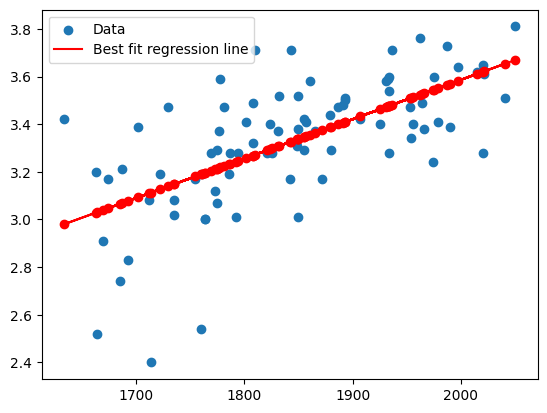

In [14]:
# data visualization
plt.scatter(x['SAT'], y, label="Data")

# regression line visualization
predictions = model.predict(x)
plt.scatter(x['SAT'], predictions, color="red")
plt.plot(x['SAT'], predictions, color="red", label="Best fit regression line")

plt.legend()

### Polynomial Regression

In [84]:
# add the polynomial terms of Level
df['SAT0'] = df['SAT'] ** 0
df['SAT1'] = df['SAT'] ** 1
# df['SAT2'] = df['SAT'] ** 2
# df['SAT3'] = df['SAT'] ** 3
# df['SAT4'] = df['SAT'] ** 4

In [85]:
del df['SAT']

In [86]:
df.head()

,GPA,SAT0,SAT1
0,2.40,1,1714
1,2.52,1,1664
2,2.54,1,1760
3,2.74,1,1685
4,2.83,1,1693


In [87]:
x = df.drop('GPA', axis=1)
y = df['GPA']

In [88]:
# split data into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=123456)

In [89]:
from sklearn.linear_model import LinearRegression

# create the model
model = LinearRegression()

# train the model
model.fit(x_train, y_train)

LinearRegression()

### Model Evaluation

In [90]:
y_pred = model.predict(x_test)

y_true = y_test

In [91]:
from sklearn.metrics import mean_absolute_error

# calculate the error
mae = mean_absolute_error(y_true, y_pred)
mae

0.1822273330587928

In [92]:
from sklearn.metrics import mean_squared_error

# calculate the error
mse = mean_squared_error(y_true, y_pred)
mse

0.0684945250788445

In [93]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(y_true, y_pred)
rmse

0.2617145870578186

In [94]:
from sklearn.metrics import r2_score

r2 = r2_score(y_true, y_pred)
r2

0.27521857487655255